In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# KMeans clustering algorithm in iris data for sepal length and sepal width...

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(data = iris.data,columns = iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.drop(["petal length (cm)","petal width (cm)"],axis="columns")

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'sepal width (cm)')

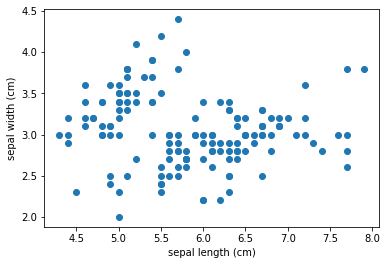

In [9]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [10]:
from sklearn.cluster import KMeans

### we have given 3 clusters, so it will divide the clusters as 3 parts...

In [11]:
km = KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])

C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [14]:
df["cluster"] = y_predicted

In [15]:
df.drop(["petal length (cm)","petal width (cm)"],axis="columns",inplace = True)

In [16]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

df0.head()

,sepal length (cm),sepal width (cm),cluster
53,5.5,2.3,0
55,5.7,2.8,0
57,4.9,2.4,0
59,5.2,2.7,0
60,5.0,2.0,0


In [17]:
km.cluster_centers_
# it represents the centers for respective clusters...

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

Text(0, 0.5, 'sepal width (cm)')

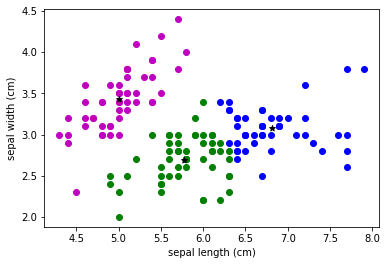

In [18]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color = "g")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "b")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "m")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= "black",marker="*")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
# the black ones are the centers of the each individual cluster...

In [19]:
# Centroid :
km.cluster_centers_ 

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

### elbow method:

In [20]:
# elbow method : it is used to find the elbow i.e, the best possible "K" value...

In [21]:

k_rng = range(1,10)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["sepal length (cm)","sepal width (cm)"]])
    sse.append(km.inertia_)      # inertia gives the sse i.e, sum of square error


C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [22]:
sse

[130.4752666666667,
 58.20409278906673,
 37.05070212765958,
 28.004814943301835,
 21.04309655809656,
 17.395204347999364,
 14.871680106658049,
 12.728480602730604,
 11.290711363636367]

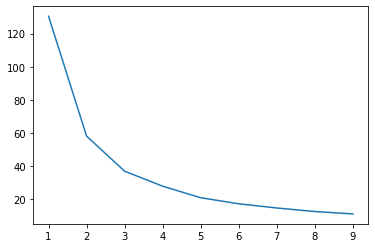

In [23]:
plt.plot(k_rng,sse)

### so for better outcomes, we prefer firstly elbow method i.e, to find the best possible "K" value.
### and then we use KMeans clustering algorithm 
### and then we find the centroids

In [25]:
# NOTE : if the columns we are predicting have wide range of difference like for ex: age=20,23,25,30... and the other one has
#        income=40k,56k,78k,88k,.... then it may not perform good clusters. then we use "MinMaxscalar"

'''
example : 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.income)
df["income"] = scaler.transform(df["income"])
df

similarly, we have to use this "MinMaxscaler" for 'age' also... then we can use the KMeans clustering algorithm...
'''

'\nexample : \n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(df.income)\ndf["income"] = scaler.transform(df["income"])\ndf\n\nsimilarly, we have to use this "MinMaxscaler" for \'age\' also... then we can use the KMeans clustering algorithm...\n'